In [527]:
import requests
from bs4 import BeautifulSoup 

In [528]:
page = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents")
page

<Response [200]>

In [529]:
print(page.status_code) 

200


In [530]:
soup = BeautifulSoup(page.content, 'html.parser') 
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by continents - Simple English Wikipedia, the free encyclopedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"98822602-f436-490f-9108-a2539a455817","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_continents","wgTitle":"List of countries by continents","wgCurRevisionId":7177107,"wgRevisionId":7177107,"wgArticleId":4810,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: empty unknown parameters","Articles needing additional

In [531]:
continent=soup.find_all('span', class_="mw-headline")
continents=[]
for i,j in enumerate(continent):
    j=j.text
    continents.append(j)
    if i==6:
      break


In [532]:
pattern=re.compile(r'\s?-\s*\w*')
a="abc - xyz"
pattern.sub(r'',a)

'abc'

In [533]:
pattern=re.compile(r'[\(|\[|\"|\-|\*|\'].*')
pattern1=re.compile(r'\s*\s$')
#li = soup.select("ol > li > a")
ol = soup.findAll("ol")
countries=[]
for j,i in enumerate(ol):
    i=i.text
    i=i.split("\n")
    z=[pattern.sub(r'',item) for item in i]
    z=[pattern1.sub(r'',item) for item in z]
    countries.append(z)
    if j==6:
        break

print(countries)


[['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Republic of the Congo', 'Democratic Republic of the Congo', 'Côte d', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'The Gambia', 'Ghana', 'Guinea', 'Guinea', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe'], ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'East Timor', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia',

In [534]:
import re
p = re.compile(r'\s[-]')

In [535]:
out = []
for item1, sublist in zip(continents, countries):    #mapping countries with the continents
    for item2 in sublist:                              
        out.append((item1, item2))
world = pd.DataFrame(out,columns=['continents','countryname'])   #saving it to pandas dataframe
world

,continents,countryname
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso
...,...,...
230,Australia/Oceania,New Caledonia
231,Australia/Oceania,New Guinea
232,Australia/Oceania,Sulawesi
233,Australia/Oceania,Sumbawa


In [536]:
page = requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report")
page

<Response [200]>

In [537]:
soup = BeautifulSoup(page.content, 'html.parser') 


In [538]:
soup.select("p > a:nth-of-type(2)")

[<a href="/wiki/Happiness" title="Happiness">happiness</a>,
 <a class="mw-redirect" href="/wiki/Richard_Layard" title="Richard Layard">Richard Layard</a>,
 <a href="/wiki/Ban_Ki-moon" title="Ban Ki-moon">Ban Ki-moon</a>,
 <a href="/wiki/Happiness#Measurement" title="Happiness">Cantril ladder</a>,
 <a href="/wiki/Psychology" title="Psychology">psychology</a>,
 <a href="/wiki/Denmark" title="Denmark">Denmark</a>,
 <a href="/wiki/Venezuela" title="Venezuela">Venezuela</a>,
 <a href="/wiki/World_Health_Organization" title="World Health Organization">World Health Organization</a>,
 <a href="/wiki/Positive_psychology" title="Positive psychology">positive psychology</a>,
 <a href="/wiki/Statistics" title="Statistics">variations</a>,
 <a href="/wiki/Catholic_Church" title="Catholic Church">Catholic</a>,
 <a href="/wiki/Old_age" title="Old age">old</a>,
 <a href="/wiki/East_Asia" title="East Asia">East Asia</a>,
 <a href="/wiki/Social_discount_rate" title="Social discount rate">discount rate</a

In [539]:
'''score=[]
for i in countries:
    j=i.lower
    score.append(soup.select("# > td:nth-of-type(1)"))
    print(i)
    #print(soup.select("# > td:nth-of-type(1)"))
score'''
score=[]
country=soup.select("tr > td:nth-of-type(2)")
happinesscore=soup.select("tr > td:nth-of-type(3)")
gdp=soup.select("tr > td:nth-of-type(4)")
socialsupport=soup.select("tr > td:nth-of-type(5)")
healthylifeexpectancy=soup.select("tr > td:nth-of-type(6)")
freedom=soup.select("tr > td:nth-of-type(7)")
generosity=soup.select("tr > td:nth-of-type(8)")
corruption=soup.select("tr > td:nth-of-type(9)")



In [540]:
def repl(s):
    y=s.replace('\xa0','')
    z=y.replace('\n','')
    return z

In [541]:
countryname=[]
happinessindex=[]
gross=[]
socialsupport1=[]
healthylifeexpectancy1=[]
freedom1=[]
generosity1=[]
corruption1=[]

for i in range(0,155):
    #country
    x=repl(country[i].text)
    countryname.append(x)
    #happinessindex
    x=repl(happinesscore[i].text)
    happinessindex.append(x)
    #gdp
    x=repl(gdp[i].text)
    gross.append(x)
    x=repl(socialsupport[i].text)
    socialsupport1.append(x)
    x=repl(healthylifeexpectancy[i].text)
    healthylifeexpectancy1.append(x)
    x=repl(freedom[i].text)
    freedom1.append(x)
    x=repl(generosity[i].text)
    generosity1.append(x)
    x=repl(corruption[i].text)
    corruption1.append(x)

len(generosity1)


155

In [542]:

WorldIndex = pd.DataFrame(
    {'countryname': countryname,
     'happinessindex': happinessindex,
     'socialsupport1': socialsupport1,
     'gross': gross,
     'healthylifeexpectancy1': healthylifeexpectancy1,
     'freedom1': freedom1,
     'generosity1':generosity1,
     'corruption1':corruption1,
     
     
     
    })

In [543]:
WorldIndex

,countryname,happinessindex,socialsupport1,gross,healthylifeexpectancy1,freedom1,generosity1,corruption1
0,Finland,7.769,1.587,1.340,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.573,1.383,0.996,0.592,0.252,0.410
2,Norway,7.554,1.582,1.488,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.624,1.380,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.522,1.396,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
150,Yemen,3.380,1.163,0.287,0.463,0.143,0.108,0.077
151,Rwanda,3.334,0.711,0.359,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.885,0.476,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.517,0.350,0.361,0.000,0.158,0.025


In [544]:
Worldindex= WorldIndex.merge(world,on='countryname')

In [545]:
Worldindex.head(50)

,countryname,happinessindex,socialsupport1,gross,healthylifeexpectancy1,freedom1,generosity1,corruption1,continents
0,Finland,7.769,1.587,1.340,0.986,0.596,0.153,0.393,Asia
1,Denmark,7.600,1.573,1.383,0.996,0.592,0.252,0.410,Asia
2,Norway,7.554,1.582,1.488,1.028,0.603,0.271,0.341,Asia
3,Iceland,7.494,1.624,1.380,1.026,0.591,0.354,0.118,Asia
4,Netherlands,7.488,1.522,1.396,0.999,0.557,0.322,0.298,Asia
5,Switzerland,7.480,1.526,1.452,1.052,0.572,0.263,0.343,Asia
6,Sweden,7.343,1.487,1.387,1.009,0.574,0.267,0.373,Asia
7,New Zealand,7.307,1.557,1.303,1.026,0.585,0.330,0.380,South America
8,Canada,7.278,1.505,1.365,1.039,0.584,0.285,0.308,Europe
9,Austria,7.246,1.475,1.376,1.016,0.532,0.244,0.226,Asia


In [546]:
import matplotlib.pyplot as plt

In [547]:
WorldInd.set_index('countryname')


,happinessindex,socialsupport1,gross,healthylifeexpectancy1,freedom1,generosity1,corruption1,continents
countryname,,,,,,,,
Finland,7.769,1.587,1.340,0.986,0.596,0.153,0.393,Asia
Denmark,7.600,1.573,1.383,0.996,0.592,0.252,0.410,Asia
Norway,7.554,1.582,1.488,1.028,0.603,0.271,0.341,Asia
Iceland,7.494,1.624,1.380,1.026,0.591,0.354,0.118,Asia
Netherlands,7.488,1.522,1.396,0.999,0.557,0.322,0.298,Asia
...,...,...,...,...,...,...,...,...
Yemen,3.380,1.163,0.287,0.463,0.143,0.108,0.077,Antarctica
Rwanda,3.334,0.711,0.359,0.614,0.555,0.217,0.411,Africa
Tanzania,3.231,0.885,0.476,0.499,0.417,0.276,0.147,Africa


In [548]:
columns=['happinessindex','socialsupport1','gross','healthylifeexpectancy1','freedom1','generosity1','corruption1']
WorldIndex[columns] = WorldInd[columns].apply(pd.to_numeric)


In [549]:
WorldIndex.dtypes

countryname                object
happinessindex            float64
socialsupport1            float64
gross                     float64
healthylifeexpectancy1    float64
freedom1                  float64
generosity1               float64
corruption1               float64
dtype: object

In [550]:
worldindex=WorldIndex.dropna()

In [551]:
worldindex.tail(10)['countryname']

141       Comoros
142    Madagascar
143       Lesotho
144       Burundi
145      Zimbabwe
146         Haiti
147      Botswana
148         Syria
149        Malawi
150         Yemen
Name: countryname, dtype: object

In [552]:
worldindex['happinessindex'].mean()

5.44235761589404

/Users/mayank/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='happinessindex', ylabel='Density'>

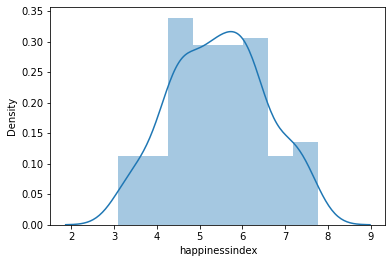

In [553]:
sns.distplot(worldindex['happinessindex'])

In [554]:
median=worldindex['happinessindex'].median()

In [555]:
worldindex.loc[worldindex['happinessindex'] > median]

,countryname,happinessindex,socialsupport1,gross,healthylifeexpectancy1,freedom1,generosity1,corruption1
0,Finland,7.769,1.587,1.340,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.573,1.383,0.996,0.592,0.252,0.410
2,Norway,7.554,1.582,1.488,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.624,1.380,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.522,1.396,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
70,Moldova,5.529,1.328,0.685,0.739,0.245,0.181,0.000
71,Libya,5.525,1.303,1.044,0.673,0.416,0.133,0.152
72,Montenegro,5.523,1.361,1.051,0.871,0.197,0.142,0.080
73,Tajikistan,5.467,1.098,0.493,0.718,0.389,0.230,0.144


In [556]:
worldindex['happinessindex'].corr(worldindex['gross'])

0.7944601886789198

<AxesSubplot:>

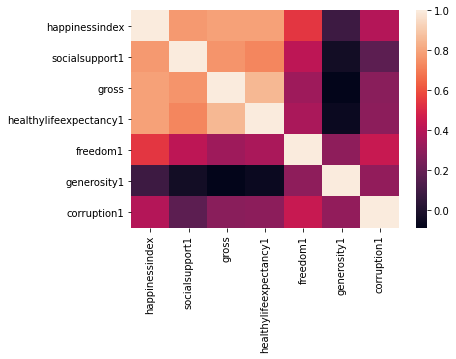

In [557]:

sns.heatmap(worldindex.corr())

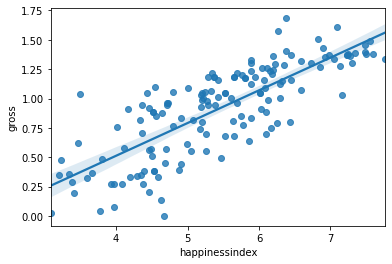

In [558]:
sns.regplot(x="happinessindex", y="gross", data=worldindex);


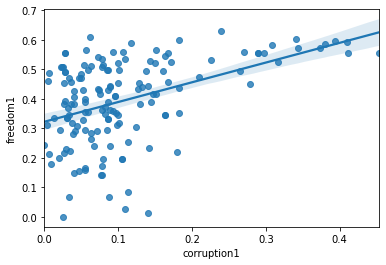

In [559]:
sns.regplot(x="corruption1", y="freedom1", data=worldindex);